## Initialize and load data


In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Import data
heart_data = "heart.csv"
heart_df = pd.read_csv("heart.csv")

## Data Exploration

Understanding the dataset and key features.

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
 heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


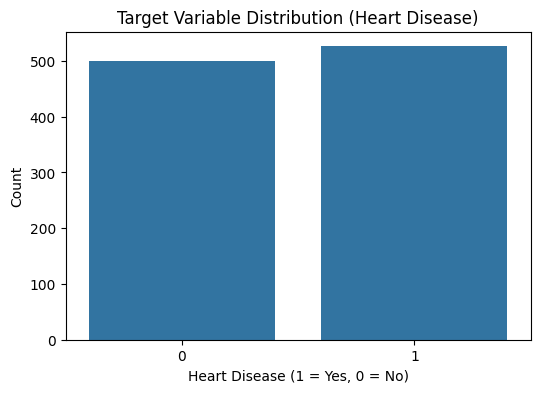

In [7]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=heart_df, x='target')
plt.title("Target Variable Distribution (Heart Disease)")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

## Data Processing

Cleaning the data, handling missing values, and normalizing features.

In [9]:
# X_train_scaled[:5], X_test_scaled[:5] 

# Features and target
feature_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X = heart_df[feature_cols]
y = heart_df.target

# One-hot encoding for categorical features: 'cp', 'restecg', 'slope', 'thal'
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Normalize the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]

(array([[ 0.39545633, -1.52752523,  0.27057613,  1.41717396,  2.47597148,
          0.12501525, -0.72203588, -0.9092496 ,  1.2048677 ,  2.26260977,
         -0.60929259, -0.27332236, -0.9927095 , -0.11111111, -0.93388764,
          1.07869754, -0.2548236 ,  0.93847426, -0.81649658],
        [ 0.5040909 ,  0.65465367,  1.64475372,  0.51710826, -0.40388187,
         -1.07422115, -0.72203588, -0.9092496 , -0.73999749, -0.44196751,
         -0.60929259,  3.65868349, -0.9927095 , -0.11111111, -0.93388764,
          1.07869754, -0.2548236 ,  0.93847426, -0.81649658],
        [ 0.72136003,  0.65465367,  1.07217972, -0.0698911 ,  2.47597148,
         -0.54122719,  1.38497273, -0.0572502 , -0.73999749, -0.44196751,
          1.6412476 , -0.27332236,  1.00734404, -0.11111111,  1.07079263,
         -0.92704392, -0.2548236 ,  0.93847426, -0.81649658],
        [ 0.5040909 ,  0.65465367,  2.21732771,  1.55414048, -0.40388187,
         -0.4079787 ,  1.38497273,  1.98754835, -0.73999749, -0.44196751,


## Modeling
Implementing and evaluating machine learning model - Logistic Regression

In [11]:
# instantiate the model (using the default parameters)
logistic_reg = LogisticRegression(max_iter=1000, random_state=16)

# fit the model with data
logistic_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test_scaled)
y_proba = logistic_reg.predict_proba(X_test_scaled)[:, 1]

## Evaluation
Evaluate your model

In [13]:
# Evaluation metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[82 21]
 [ 9 93]]


Text(0.5, 427.9555555555555, 'Predicted label')

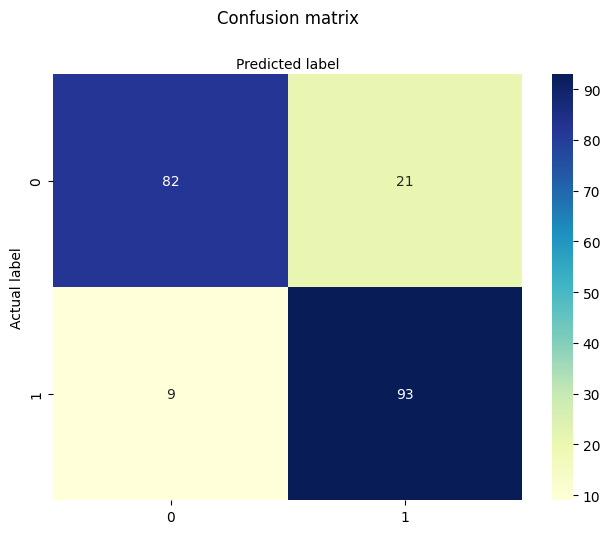

In [31]:
# Visualize confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Classification report
target_names = ['No heart disease', 'Has heart disease']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

 No heart disease       0.90      0.80      0.85       103
Has heart disease       0.82      0.91      0.86       102

         accuracy                           0.85       205
        macro avg       0.86      0.85      0.85       205
     weighted avg       0.86      0.85      0.85       205



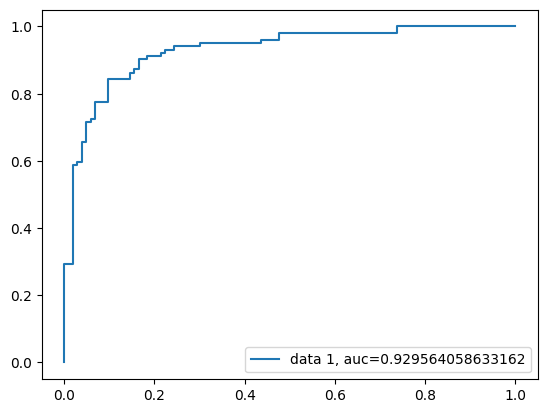

In [16]:
# ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()